<a href="https://colab.research.google.com/github/Anhad-01/Air-Sound-Monitoring-Prediction/blob/main/iot_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import pearsonr, spearmanr

Plotting the features

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
data = pd.read_csv('iot_project_data2.csv')

# Parse 'created_at' as datetime and set as index
data['created_at'] = pd.to_datetime(data['created_at'], format='%d-%m-%Y %H:%M')
data.set_index('created_at', inplace=True)

# Extract the feature columns
features = ['temperature', 'humidity', 'sound', 'gas']

# Plot each feature individually
for feature in features:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data[feature], mode='lines', name=feature))
    fig.update_layout(title=f"{feature} Over Time", xaxis_title="Time", yaxis_title=feature)
    fig.show()

# Plot all features together in a single plot
fig = go.Figure()

for feature in features:
    fig.add_trace(go.Scatter(x=data.index, y=data[feature], mode='lines', name=feature))

fig.update_layout(
    title="All Features Over Time",
    xaxis_title="Time",
    yaxis_title="Values",
    legend_title="Features"
)
fig.show()


Data Statistics

In [ ]:
data.head()       # Display the first few rows
data.info()       # Check for data types and null values
data.describe()   # Get summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24470 entries, 2024-11-14 08:33:00 to 2024-11-26 09:47:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entry_id     24470 non-null  int64  
 1   humidity     24470 non-null  float64
 2   temperature  24470 non-null  float64
 3   sound        24470 non-null  int64  
 4   gas          24470 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.1 MB


entry_id      humidity   temperature    sound           gas
count  24470.00000  24470.000000  24470.000000  24470.0  24470.000000
mean   12235.50000     65.198128     21.038835      0.0    403.074478
std     7064.02488     21.224463      5.765921      0.0    352.028039
min        1.00000     13.700000     13.500000      0.0     29.805290
25%     6118.25000     47.400000     16.700000      0.0     98.582660
50%    12235.50000     74.100000     19.200000      0.0    375.765350
75%    18352.75000     81.700000     24.900000      0.0    589.215880
max    24470.00000     92.600000     39.800000      0.0   2469.325930

In [ ]:
data = data.dropna()

Computing the correlation matrix

In [ ]:
# Select only the first 4 numerical columns explicitly
numerical_data = data[['humidity', 'temperature', 'sound', 'gas']]


print(data.dtypes)  # Check data types of all columns

# Compute the Pearson Correlation Matrix
corr_matrix = numerical_data.corr(method='pearson')

# Display the correlation matrix
print(corr_matrix)

entry_id         int64
humidity       float64
temperature    float64
sound            int64
gas            float64
dtype: object
             humidity  temperature  sound       gas
humidity     1.000000    -0.887230    NaN -0.087509
temperature -0.887230     1.000000    NaN -0.162658
sound             NaN          NaN    NaN       NaN
gas         -0.087509    -0.162658    NaN  1.000000


Using a heatmap to visualise correlations

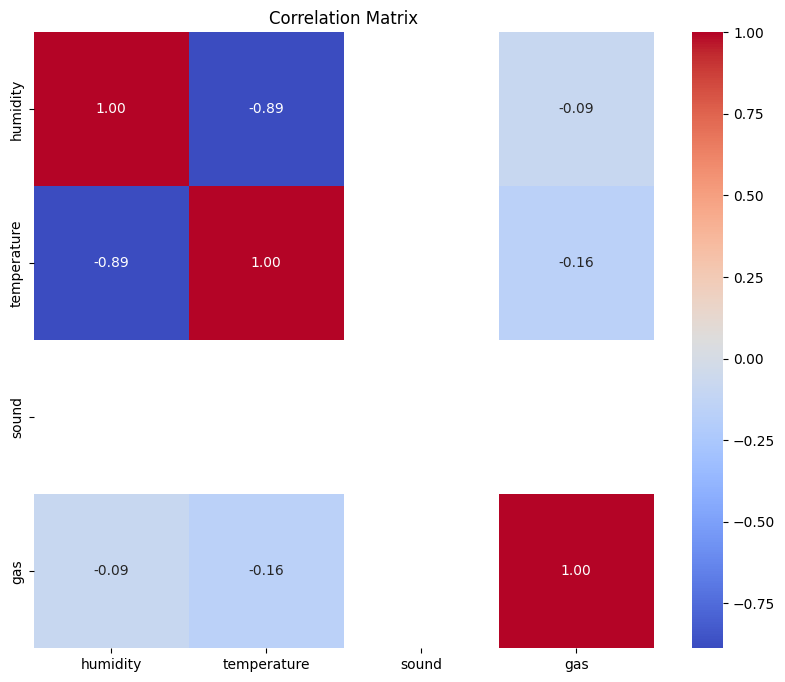

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Scaling data for applying K-Means algorithm

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['humidity', 'temperature', 'sound', 'gas']])

Determining optimal number of clusters using elbow method

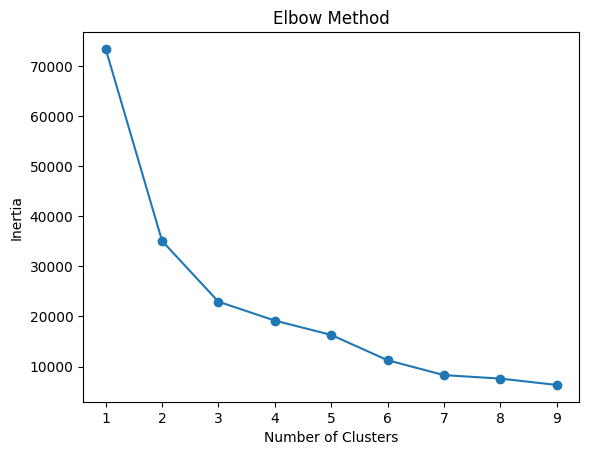

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Fitting K-Means with chosen number of clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the optimal number from the elbow plot
data['Cluster'] = kmeans.fit_predict(scaled_data)

Plotting clusters


Cluster Summary (Mean Feature Values):
             entry_id   humidity  temperature  sound         gas
Cluster                                                         
0        16532.052000  77.089696    16.435547    0.0  689.829699
1        11060.293742  35.278799    28.851582    0.0  434.272023
2         9212.664688  77.491491    19.200132    0.0  116.392439

Cluster Size (Number of Points in Each Cluster):
Cluster
2    9096
0    8327
1    7047
Name: count, dtype: int64


<ipython-input-14-84a17764355e>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




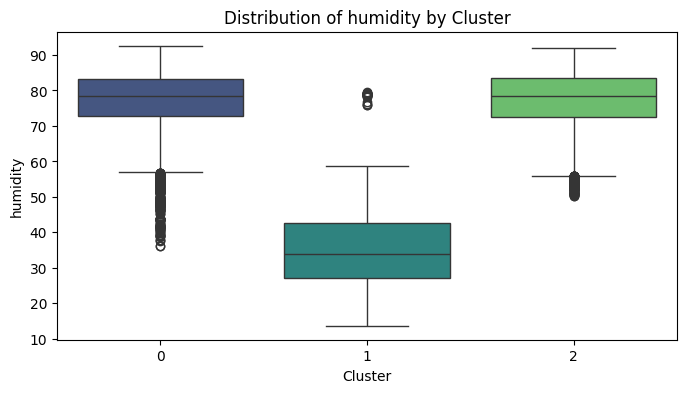

<ipython-input-14-84a17764355e>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




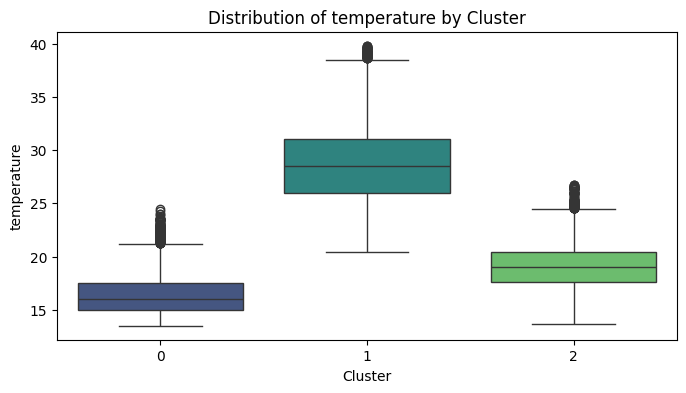

<ipython-input-14-84a17764355e>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




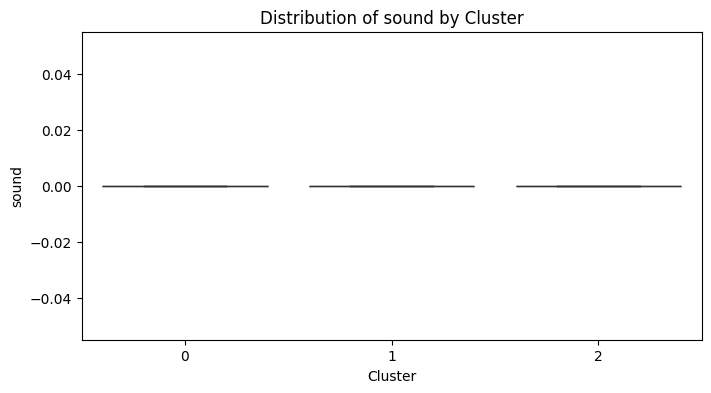

<ipython-input-14-84a17764355e>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




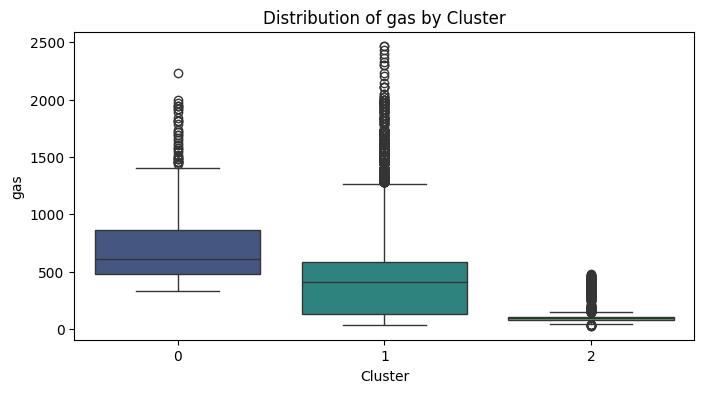

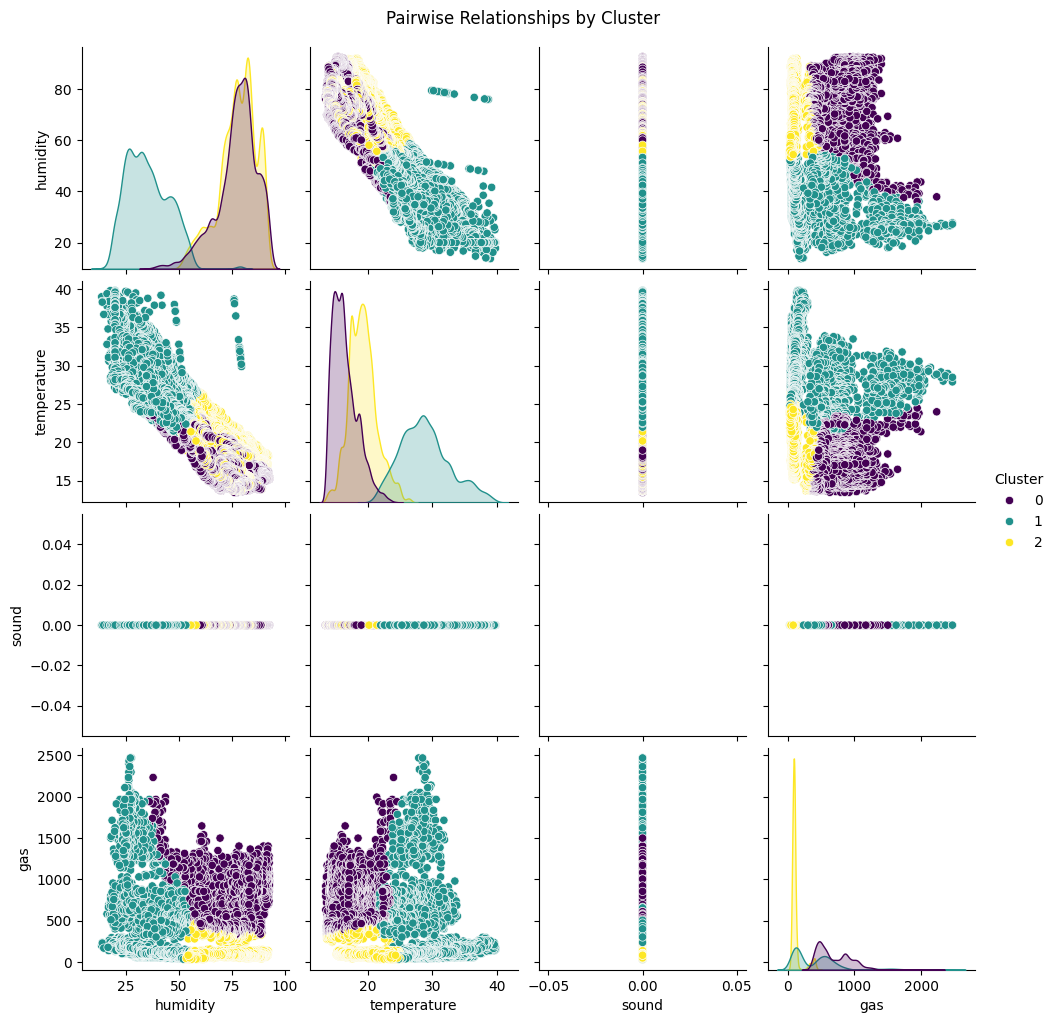


Cluster Centroids:
          humidity  temperature  sound         gas
Cluster                                           
0        77.089696    16.435547    0.0  689.829699
1        35.278799    28.851582    0.0  434.272023
2        77.491491    19.200132    0.0  116.392439

Cluster 0 Analysis:
Number of Points: 8327
Temperature Range: 13.5 - 24.5
Humidity Range: 36.1 - 92.6
Sound Range: 0 - 0
Gas Range: 331.96481 - 2233.57324


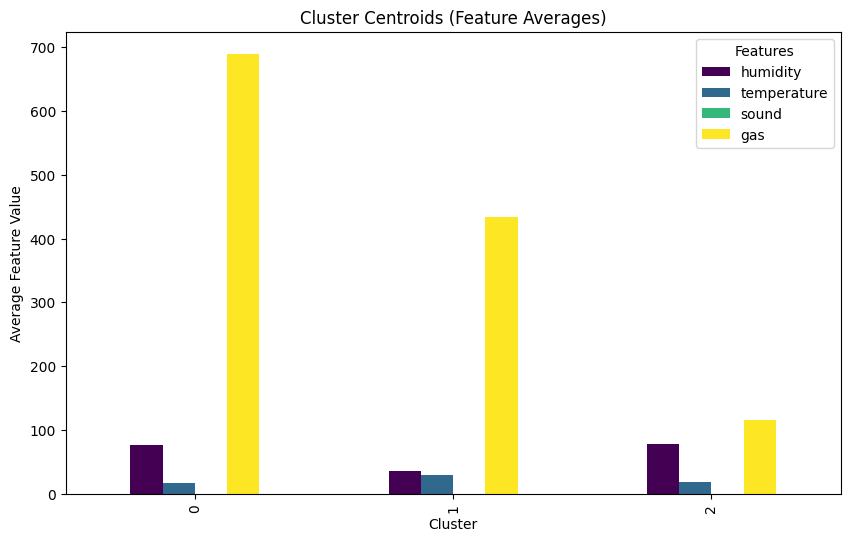


Comparing Clusters:

humidity by Cluster:
          count       mean       std   min   25%   50%   75%   max
Cluster                                                           
0        8327.0  77.089696  9.600194  36.1  72.7  78.4  83.3  92.6
1        7047.0  35.278799  9.874734  13.7  27.2  33.9  42.7  79.5
2        9096.0  77.491491  8.822529  50.3  72.5  78.3  83.5  92.0

temperature by Cluster:
          count       mean       std   min   25%   50%   75%   max
Cluster                                                           
0        8327.0  16.435547  1.928728  13.5  15.0  16.0  17.5  24.5
1        7047.0  28.851582  3.830353  20.4  26.0  28.5  31.0  39.8
2        9096.0  19.200132  2.143775  13.7  17.6  19.0  20.4  26.7

sound by Cluster:
          count  mean  std  min  25%  50%  75%  max
Cluster                                            
0        8327.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        7047.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        9096.0   0.0  0.0  0.0  0.

In [ ]:
# Features to use for clustering
features = ['humidity', 'temperature', 'sound', 'gas']

# Step 1: Standardize the features for K-Means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the optimal number of clusters
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 3: Infer Insights from Clusters

# Select only numeric columns for analysis
numeric_columns = data.select_dtypes(include=['number'])

# 1. Cluster Summary
cluster_summary = numeric_columns.groupby('Cluster').mean()
print("\nCluster Summary (Mean Feature Values):")
print(cluster_summary)

# 2. Cluster Size
cluster_sizes = data['Cluster'].value_counts()
print("\nCluster Size (Number of Points in Each Cluster):")
print(cluster_sizes)

# 3. Visualize Feature Distributions by Cluster
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# 4. Visualize Pairwise Relationships
sns.pairplot(data, vars=features, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Pairwise Relationships by Cluster", y=1.02)
plt.show()

# 5. Cluster Centroids
cluster_centroids = numeric_columns.groupby('Cluster')[features].mean()
print("\nCluster Centroids:")
print(cluster_centroids)

# 6. Analyze Individual Clusters
# Example: Analyze Cluster 0
cluster_0 = data[data['Cluster'] == 0]
print("\nCluster 0 Analysis:")
print(f"Number of Points: {len(cluster_0)}")
print(f"Temperature Range: {cluster_0['temperature'].min()} - {cluster_0['temperature'].max()}")
print(f"Humidity Range: {cluster_0['humidity'].min()} - {cluster_0['humidity'].max()}")
print(f"Sound Range: {cluster_0['sound'].min()} - {cluster_0['sound'].max()}")
print(f"Gas Range: {cluster_0['gas'].min()} - {cluster_0['gas'].max()}")

# 7. Visualize Cluster Centroids
centroids_plot = cluster_centroids.plot(kind='bar', figsize=(10, 6), colormap='viridis', title="Cluster Centroids (Feature Averages)")
plt.xlabel('Cluster')
plt.ylabel('Average Feature Value')
plt.legend(title="Features")
plt.show()

# 8. Compare Clusters
print("\nComparing Clusters:")
for feature in features:
    print(f"\n{feature} by Cluster:")
    print(data.groupby('Cluster')[feature].describe())


Applying LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Load the dataset
data = pd.read_csv('iot_project_data2.csv')

# Parse 'created_at' as datetime and set as index
data['created_at'] = pd.to_datetime(data['created_at'], format='%d-%m-%Y %H:%M')
data.set_index('entry_id', inplace=True)

# Select features for prediction
feature_columns = ['humidity', 'temperature', 'sound', 'gas']

# Normalize the feature columns
scaler = MinMaxScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

In [ ]:
data.describe()

created_at      humidity   temperature    sound  \
count                          24470  24470.000000  24470.000000  24470.0   
mean   2024-11-19 20:53:33.829996032      0.652701      0.286648      0.0   
min              2024-11-14 08:33:00      0.000000      0.000000      0.0   
25%              2024-11-16 18:51:15      0.427123      0.121673      0.0   
50%              2024-11-19 16:54:00      0.765526      0.216730      0.0   
75%              2024-11-23 00:16:00      0.861850      0.433460      0.0   
max              2024-11-26 09:47:00      1.000000      1.000000      0.0   
std                              NaN      0.269005      0.219237      0.0   

                gas  
count  24470.000000  
mean       0.153009  
min        0.000000  
25%        0.028193  
50%        0.141815  
75%        0.229312  
max        1.000000  
std        0.144302

In [ ]:
# Train-Test Split: Last 6 hours for testing
test_data_start = data['created_at'].iloc[-1] - pd.Timedelta(hours=6)
train_data = data[data['created_at'] < test_data_start]
test_data = data[data['created_at'] >= test_data_start]

# Prepare sequences for LSTM input
def create_sequences(data, seq_length, target_columns):
    sequences = []
    targets = []
    data_array = data[target_columns].values
    for i in range(len(data_array) - seq_length):
        seq = data_array[i:i + seq_length]
        target = data_array[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [ ]:
sequence_length = 10  # Example sequence length
X_train, y_train = create_sequences(train_data, sequence_length, feature_columns)
X_test, y_test = create_sequences(test_data, sequence_length, feature_columns)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (23783, 10, 4), (23783, 4)
Testing data shape: (667, 10, 4), (667, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(len(feature_columns), activation='linear')  # Output layer for each feature
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,212 (118.02 KB)

 Trainable params: 30,212 (118.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Adjust epochs based on performance
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0166 - val_loss: 0.0014
Epoch 2/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 3/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 4/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 5/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0010 - val_loss: 9.9380e-04
Epoch 12/50
595/595 ━━━━━━━━━━

In [ ]:
# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7684e-04
Test Loss: 0.00021764497796539217


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


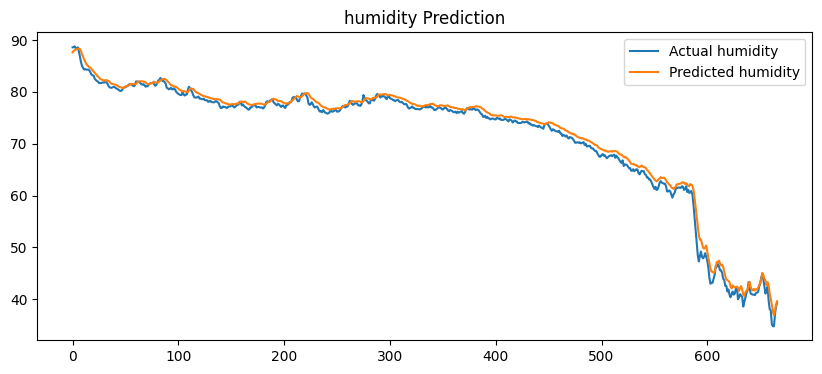

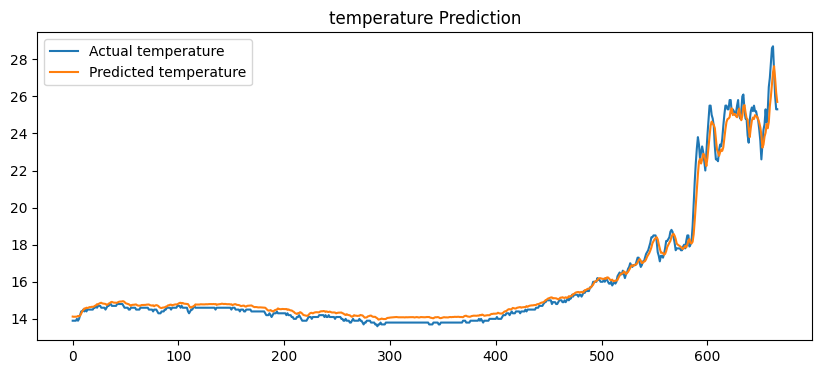

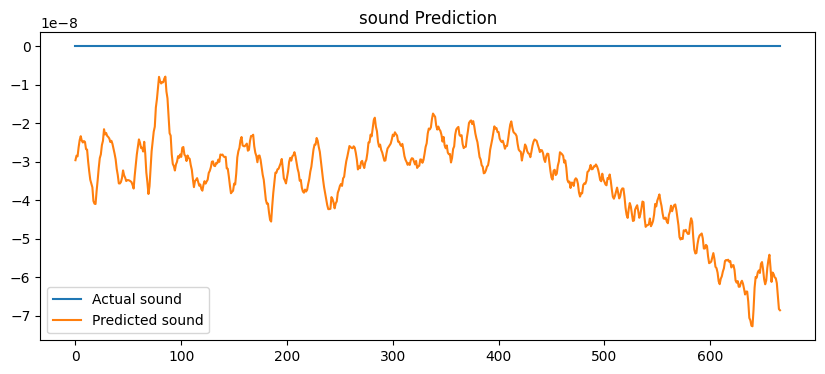

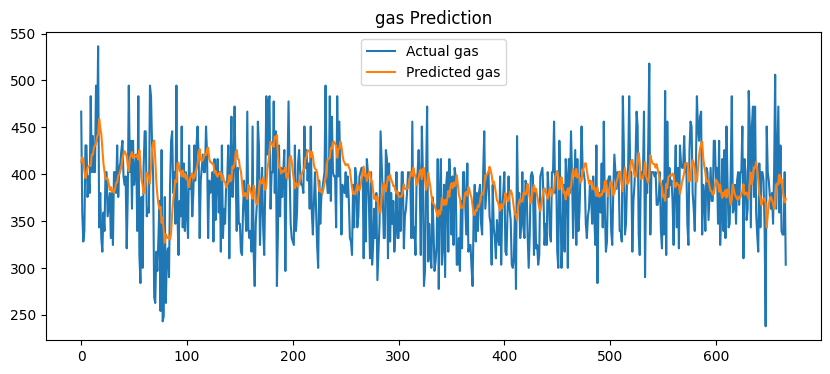

In [ ]:
# Predict on test data
predictions = model.predict(X_test)

# Rescale predictions back to original scale
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)

# Compare predictions with actual values
import matplotlib.pyplot as plt

for i, feature in enumerate(feature_columns):
    plt.figure(figsize=(10, 4))
    plt.plot(actual_values[:, i], label=f"Actual {feature}")
    plt.plot(predicted_values[:, i], label=f"Predicted {feature}")
    plt.title(f"{feature} Prediction")
    plt.legend()
    plt.show()

Calculating MAPE scores

In [ ]:
import numpy as np

# Define a function to calculate MAPE
def calculate_mape(actual, predicted):
    # Avoid division by zero by replacing zeros with a small value
    actual = np.where(actual == 0, 1e-7, actual)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mape

# Calculate MAPE for each feature
mape_scores = {}
for i, feature in enumerate(feature_columns):
    mape = calculate_mape(actual_values[:, i], predicted_values[:, i])
    mape_scores[feature] = mape
    print(f"MAPE for {feature}: {mape:.2f}%")

# Optional: Display MAPE scores in a structured format
print("Overall MAPE Scores:")
for feature, score in mape_scores.items():
    print(f"{feature}: {score:.2f}%")

MAPE for humidity: 1.35%
MAPE for temperature: 1.71%
MAPE for sound: 134.42%
MAPE for gas: 11.83%
Overall MAPE Scores:
humidity: 1.35%
temperature: 1.71%
sound: 134.42%
gas: 11.83%


In [ ]:
# Function to predict the next n points
def predict_future(data, model, sequence_length, feature_columns, num_predictions):
    last_sequence = data[feature_columns].values[-sequence_length:]
    future_predictions = []

    for _ in range(num_predictions):
        pred_input = last_sequence[-sequence_length:].reshape(1, sequence_length, len(feature_columns))
        prediction = model.predict(pred_input)
        future_predictions.append(prediction[0])
        last_sequence = np.vstack([last_sequence, prediction])

    return np.array(future_predictions)

# Predict the next 500 points
num_predictions = 500
future_predictions = predict_future(data, model, sequence_length, feature_columns, num_predictions)

# Rescale predictions back to original scale
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

# Save the predictions to a CSV file
predicted_df = pd.DataFrame(future_predictions_rescaled, columns=feature_columns)
predicted_df.to_csv('predicted_values.csv', index=False)

print("Predicted values saved to 'predicted_values.csv'.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

In [ ]:
predicted_df.head()

humidity  temperature         sound         gas
0  39.606373    25.605810 -6.535311e-08  358.778503
1  39.573765    25.631981 -6.285310e-08  354.254791
2  39.826874    25.567448 -6.011781e-08  350.669891
3  40.177547    25.461838 -5.728603e-08  346.269196
4  40.479946    25.343325 -5.629590e-08  344.707886

In [ ]:
predicted_df.tail()

humidity  temperature         sound         gas
495  87.193077    14.972192 -7.274795e-08  567.565735
496  87.194870    14.970889 -7.278658e-08  567.693970
497  87.196617    14.969597 -7.282489e-08  567.821106
498  87.198349    14.968318 -7.286295e-08  567.947144
499  87.200043    14.967050 -7.290063e-08  568.072083

(Additional)
Viusalising the time series data

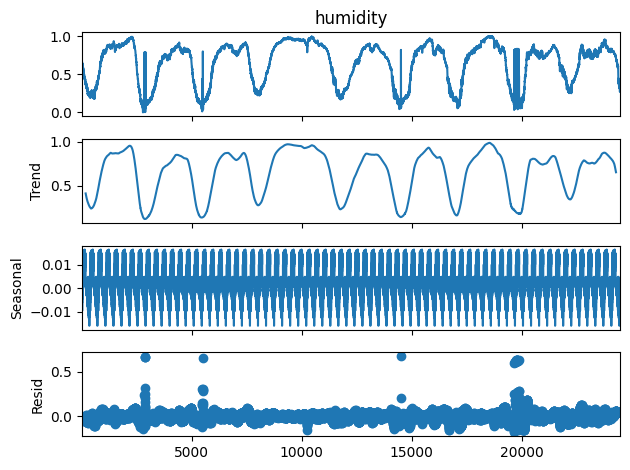

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example for humidity
humidity_data = data['humidity']

# Decompose the time series
decomposition = seasonal_decompose(humidity_data, model='additive', period=365)  # Adjust period as per data frequency
decomposition.plot()
plt.show()


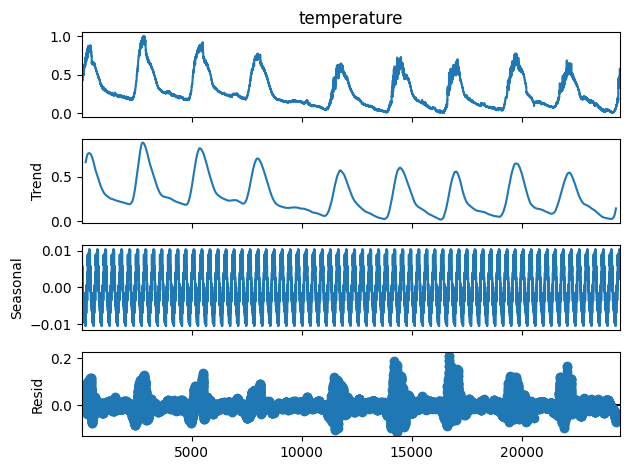

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example for temperature
temperature_data = data['temperature']

# Decompose the time series
decomposition = seasonal_decompose(temperature_data, model='additive', period=365)  # Adjust period as per data frequency
decomposition.plot()
plt.show()


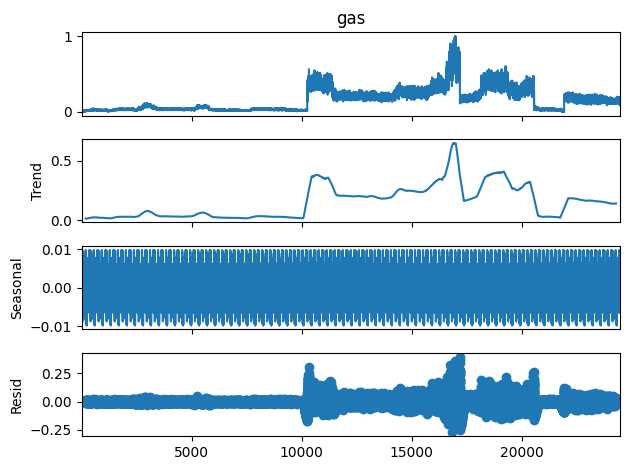

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example for gas
gas_data = data['gas']

# Decompose the time series
decomposition = seasonal_decompose(gas_data, model='additive', period=365)  # Adjust period as per data frequency
decomposition.plot()
plt.show()
